In [36]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#loading dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)



In [37]:
# EXPLORATORY DATA ANALYSIS (EDA)

print(df.shape) #rows and columns
print(df.head()) #first 5 rows
print(df.describe())
print(df.info())
print(df.isnull().sum()) #check missing values


(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.0000

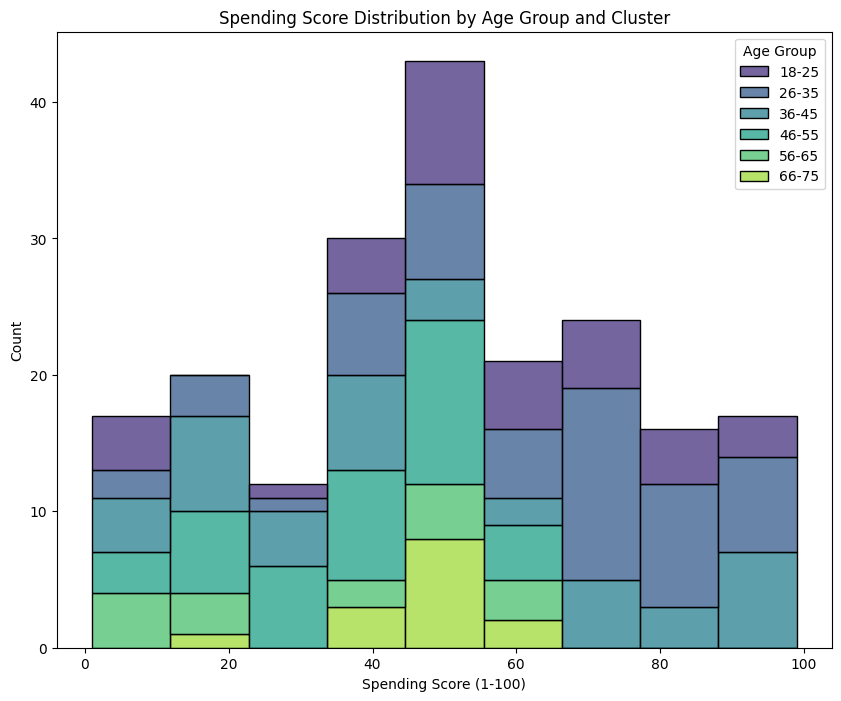

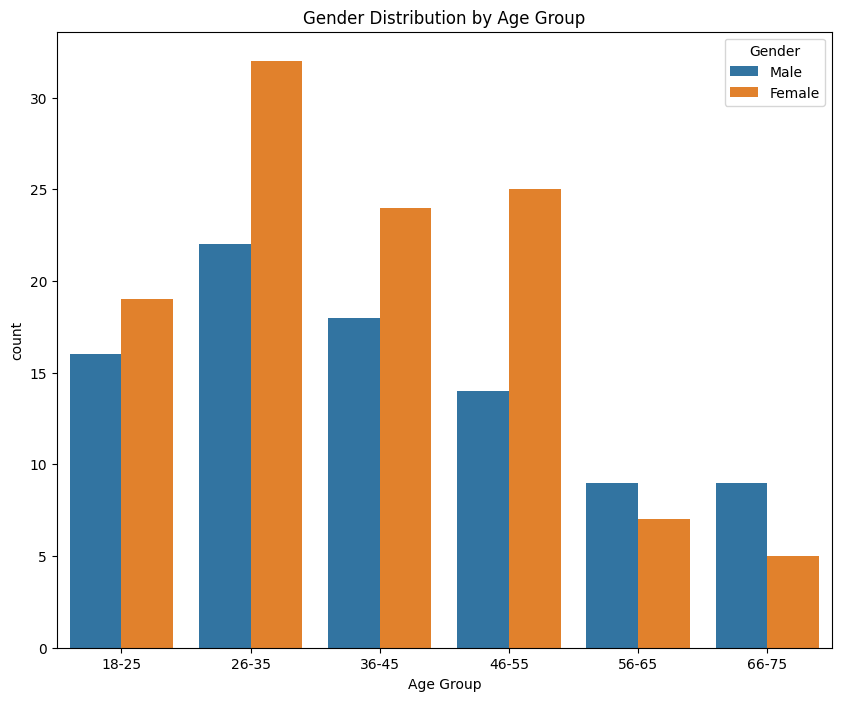

Average spending score by gender:
Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


In [38]:
# DATA VISUALIZATION

#age bins
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Spending Score by Age Group and Cluster
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Spending Score (1-100)', hue='Age Group', multiple='stack', palette='viridis')
plt.title('Spending Score Distribution by Age Group and Cluster')
plt.show()

# Gender Distribution by Age Group
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Gender Distribution by Age Group')
plt.show()

# Spending Score by Gender
print("Average spending score by gender:")
print(df.groupby('Gender')['Spending Score (1-100)'].mean())




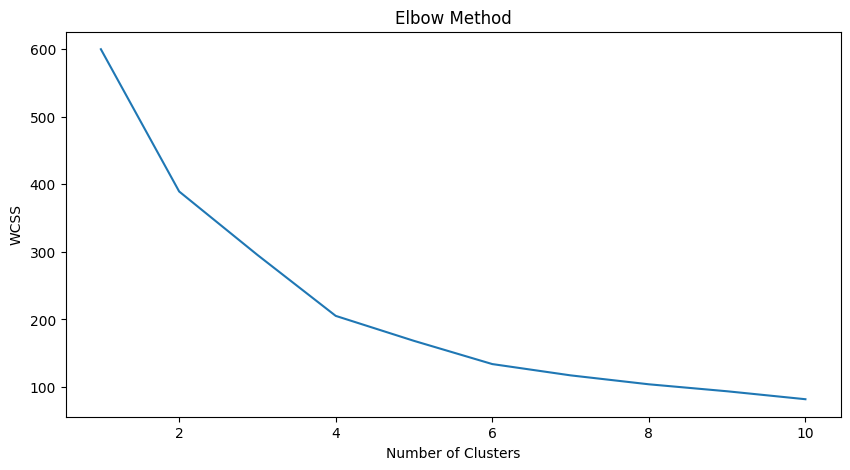

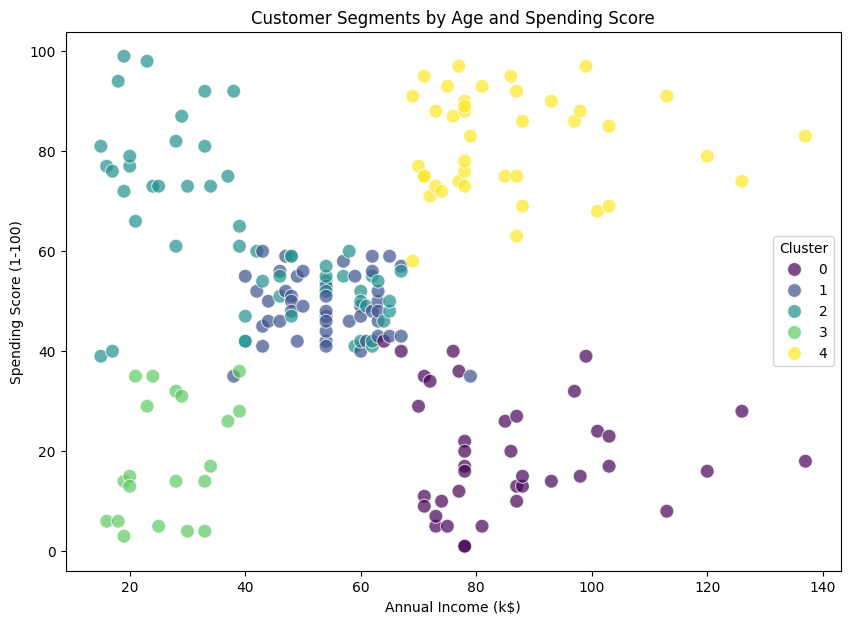

Cluster Summary:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        159.743590  39.871795           86.102564               19.358974
1         83.872340  55.638298           54.382979               48.851064
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        161.025000  32.875000           86.100000               81.525000


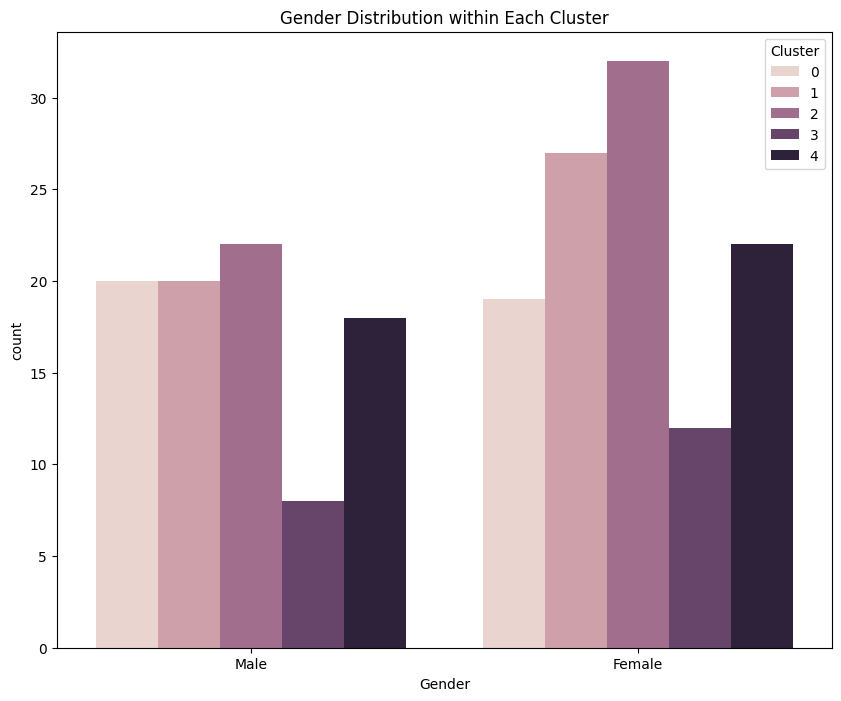

Average spending score by cluster:
Cluster
0    19.358974
1    48.851064
2    62.240741
3    18.350000
4    81.525000
Name: Spending Score (1-100), dtype: float64


In [41]:
# CUSTOMER SEGMENTATION

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments by Age and Spending Score')
plt.show()

# Descriptive statistics for each cluster
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Summary:")
print(cluster_summary)

# Gender distribution within each cluster
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Gender', hue='Cluster')
plt.title('Gender Distribution within Each Cluster')
plt.show()

# Average spending score by cluster
print("Average spending score by cluster:")
print(df.groupby('Cluster')['Spending Score (1-100)'].mean())